In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def roberts_edge_detection(gray_image):
    # Roberts Cross Kernels
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    gx = cv2.filter2D(gray_image, -1, kernel_x)
    gy = cv2.filter2D(gray_image, -1, kernel_y)
    return cv2.addWeighted(cv2.convertScaleAbs(gx), 0.5, cv2.convertScaleAbs(gy), 0.5, 0)

def prewitt_edge_detection(gray_image):
    # Prewitt Kernels
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    gx = cv2.filter2D(gray_image, -1, kernel_x)
    gy = cv2.filter2D(gray_image, -1, kernel_y)
    return cv2.addWeighted(cv2.convertScaleAbs(gx), 0.5, cv2.convertScaleAbs(gy), 0.5, 0)

def sobel_edge_detection(gray_image):
    # Sobel มีใน OpenCV อยู่แล้ว
    gx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.convertScaleAbs(cv2.sqrt(cv2.add(cv2.pow(gx, 2), cv2.pow(gy, 2))))

def canny_edge_detection(gray_image):
    return cv2.Canny(gray_image, threshold1=100, threshold2=200)

def process_image(image_path, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    gray_image = load_and_convert_to_grayscale(image_path)
    if gray_image is None: return
        
    results = {
        "Original": cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB),
        "Grayscale": gray_image,
        "Roberts": roberts_edge_detection(gray_image),
        "Prewitt": prewitt_edge_detection(gray_image),
        "Sobel": sobel_edge_detection(gray_image),
        "Canny": canny_edge_detection(gray_image)
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'Edge Detection Comparison: {os.path.basename(image_path)}', fontsize=16)
    
    for ax, (title, img) in zip(axes.ravel(), results.items()):
        cmap = 'gray' if title != "Original" else None
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')
    
    plt.tight_layout()
    save_path = os.path.join(output_dir, f"result_{os.path.basename(image_path)}")
    plt.savefig(save_path)

Processing single file: C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\picture3.jpg


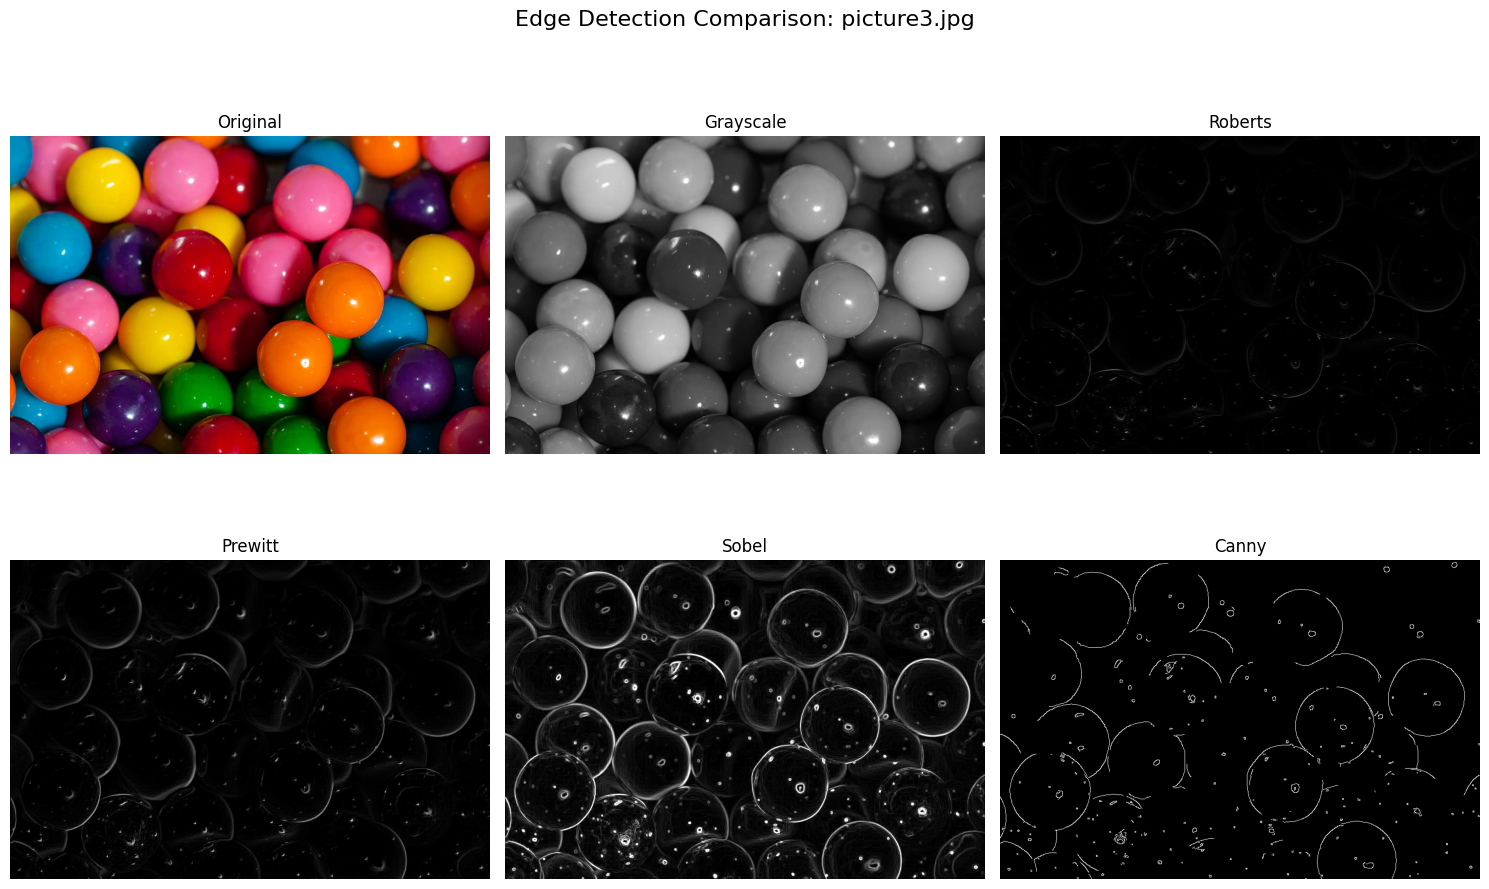

Processing single file: C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\pic_circle1.jpg


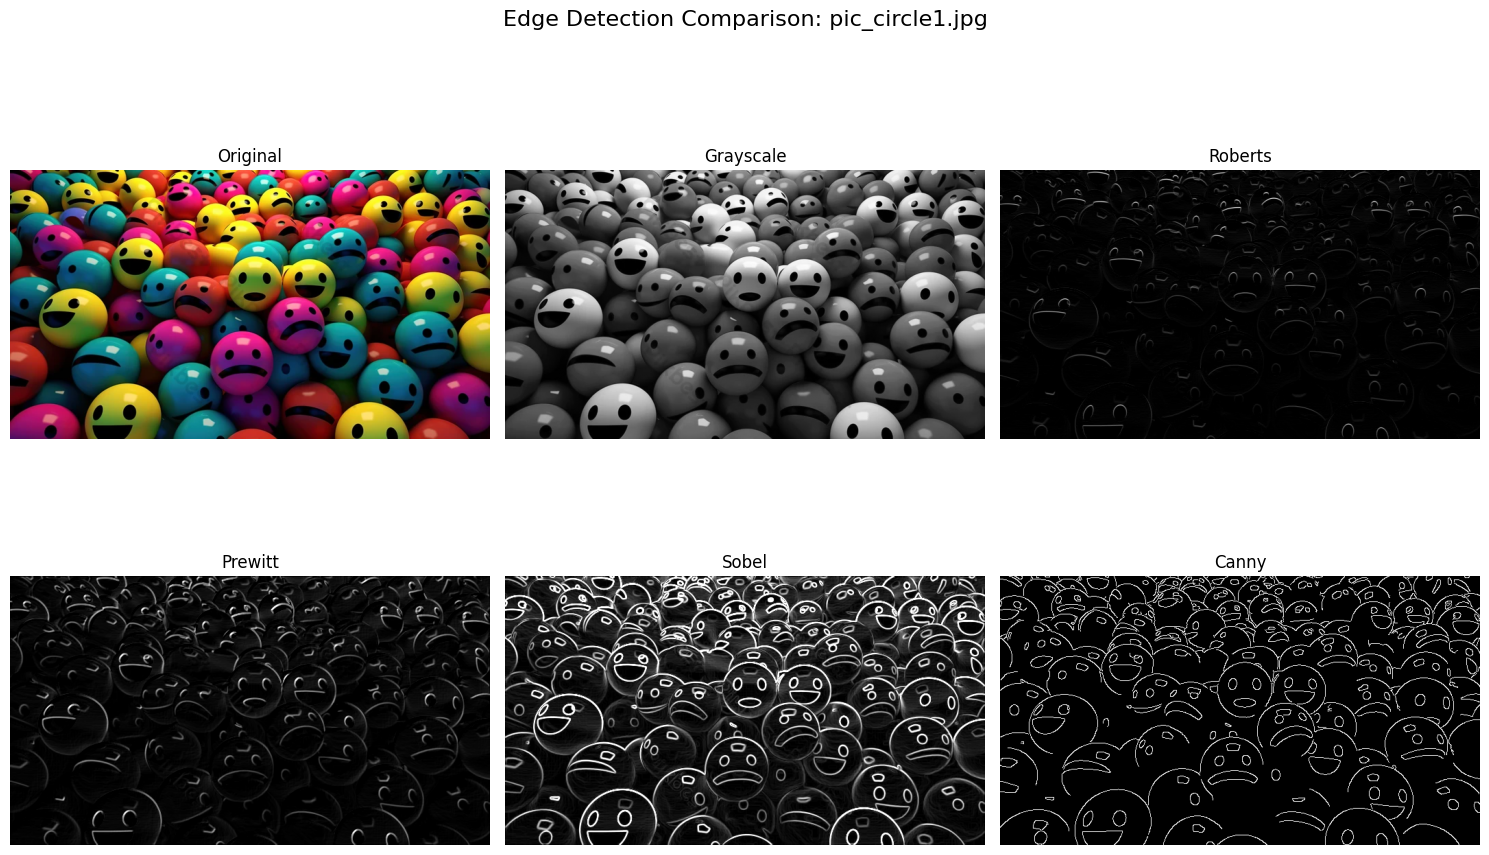

Processing single file: C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\Pic_circle2.jpg


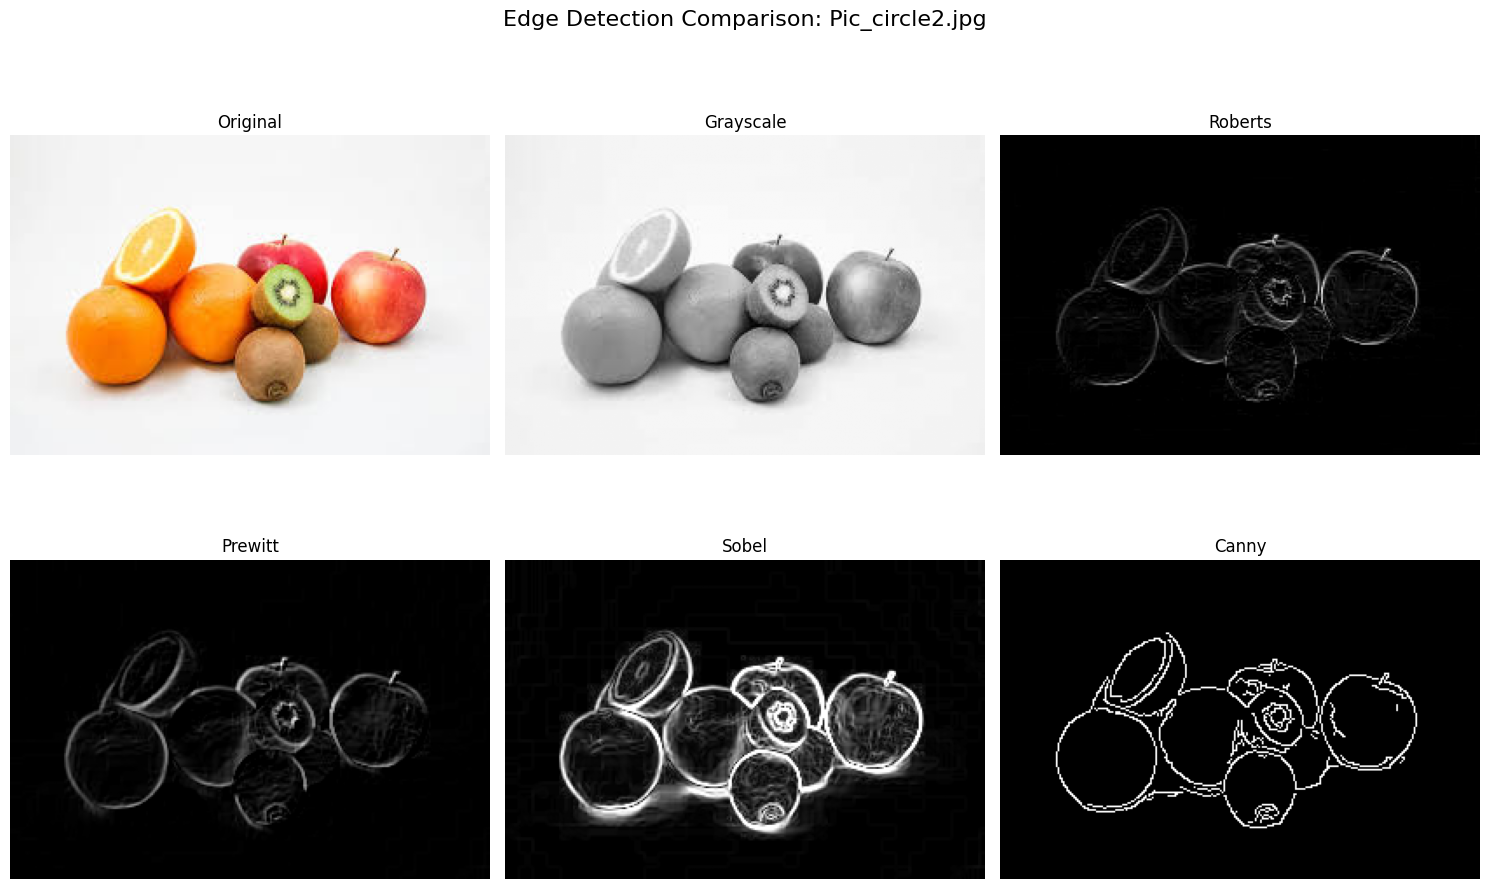

In [3]:
INPUT_PATH = r"C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\picture3.jpg"
INPUT_PATH_CIRCLE1 = r"C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\pic_circle1.jpg"
INPUT_PATH_CIRCLE2 = r"C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\Pic_circle2.jpg"

def main():
    targets = [
        INPUT_PATH,
        INPUT_PATH_CIRCLE1,
        INPUT_PATH_CIRCLE2
    ]

    for target in targets:
        if not os.path.exists(target):
            print(f"Critical Error: The path '{target}' does not exist.")
            continue

        if os.path.isfile(target):
            print(f"Processing single file: {target}")
            process_image(target)
            plt.show()

        elif os.path.isdir(target):
            valid_exts = ('.jpg', '.jpeg', '.png', '.bmp')
            print(f"Processing folder: {target}")

            for file in os.listdir(target):
                if file.lower().endswith(valid_exts):
                    full_path = os.path.join(target, file)
                    process_image(full_path)
                    plt.close()

            print("Batch processing complete. Check the 'output' folder.")

if __name__ == "__main__":
    main()

# พี่ปาล์มทำไม่ครบน้องผาเพิ่มเส้น

In [4]:
INPUT_PATH = r"C:\Users\enjoykubphom\Documents\GitHub\Mini_Visionv1\img\line1.jpg" 

def main():
    target = INPUT_PATH

    if not os.path.exists(target):
        print(f"Critical Error: The path '{target}' does not exist.")
        print("Please check your file name or folder structure.")
        return

    if os.path.isfile(target):
        print(f"Processing single file: {target}")
        process_image(target)
        plt.show()

    elif os.path.isdir(target):
        valid_exts = ('.jpg', '.jpeg', '.png', '.bmp')
        print(f"Processing folder: {target}")
        
        for file in os.listdir(target):
            if file.lower().endswith(valid_exts):
                full_path = os.path.join(target, file)
                process_image(full_path)
                plt.close()
        
        print("Batch processing complete. Check the 'output' folder.")

if __name__ == "__main__":
    main()

Critical Error: The path 'C:\Users\enjoykubphom\Documents\GitHub\Mini_Visionv1\img\line1.jpg' does not exist.
Please check your file name or folder structure.


In [5]:
INPUT_PATH = r"C:\Users\enjoykubphom\Documents\GitHub\Mini_Visionv1\img\line2.jpg" 

def main():
    target = INPUT_PATH

    if not os.path.exists(target):
        print(f"Critical Error: The path '{target}' does not exist.")
        print("Please check your file name or folder structure.")
        return

    if os.path.isfile(target):
        print(f"Processing single file: {target}")
        process_image(target)
        plt.show()

    elif os.path.isdir(target):
        valid_exts = ('.jpg', '.jpeg', '.png', '.bmp')
        print(f"Processing folder: {target}")
        
        for file in os.listdir(target):
            if file.lower().endswith(valid_exts):
                full_path = os.path.join(target, file)
                process_image(full_path)
                plt.close()
        
        print("Batch processing complete. Check the 'output' folder.")

if __name__ == "__main__":
    main()

Critical Error: The path 'C:\Users\enjoykubphom\Documents\GitHub\Mini_Visionv1\img\line2.jpg' does not exist.
Please check your file name or folder structure.


In [6]:
INPUT_PATH = r"C:\Users\enjoykubphom\Documents\GitHub\Mini_Visionv1\img\line3.jpg" 

def main():
    target = INPUT_PATH

    if not os.path.exists(target):
        print(f"Critical Error: The path '{target}' does not exist.")
        print("Please check your file name or folder structure.")
        return

    if os.path.isfile(target):
        print(f"Processing single file: {target}")
        process_image(target)
        plt.show()

    elif os.path.isdir(target):
        valid_exts = ('.jpg', '.jpeg', '.png', '.bmp')
        print(f"Processing folder: {target}")
        
        for file in os.listdir(target):
            if file.lower().endswith(valid_exts):
                full_path = os.path.join(target, file)
                process_image(full_path)
                plt.close()
        
        print("Batch processing complete. Check the 'output' folder.")

if __name__ == "__main__":
    main()

Critical Error: The path 'C:\Users\enjoykubphom\Documents\GitHub\Mini_Visionv1\img\line3.jpg' does not exist.
Please check your file name or folder structure.
